In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast 
from datetime import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv('assets/glassdoor_clean.csv')
orig_len = len(df)
print(len(df))
df.head(2)

601


title  dateposted validthrough                industry  \
0  Data Scientist  2018-04-16   2018-05-22  Information Technology   
1  Data Scientist  2018-04-19   2018-05-22        Travel & Tourism   

               orgname                                                cat  \
0  Integral Ad Science  ['15-1111.00', 'Computer and Information Resea...   
1         HotelTonight  ['15-1111.00', 'Computer and Information Resea...   

                                               descr  stars       jobid  \
0  We are seeking a Data Scientist to join our te...    3.7  2735259369   
1  HotelTonight makes it remarkably easy to book ...    4.6  2699359507   

   minsal  maxsal  medsal   empid  jobtitleid    jobreqid  \
0  120000  174000  145000  782797      119899  3203739089   
1  111000  163000  135000  639341      119899  3168666373   

                                                 url  
0  http://www.glassdoor.com/partner/jobListing.ht...  
1  http://www.glassdoor.com/partner/jobListing.ht...

In [3]:
def rand_jitter(arr, frac = 0.02):
    '''Add random jitter to an array'''
    displacement = frac*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * displacement

### category

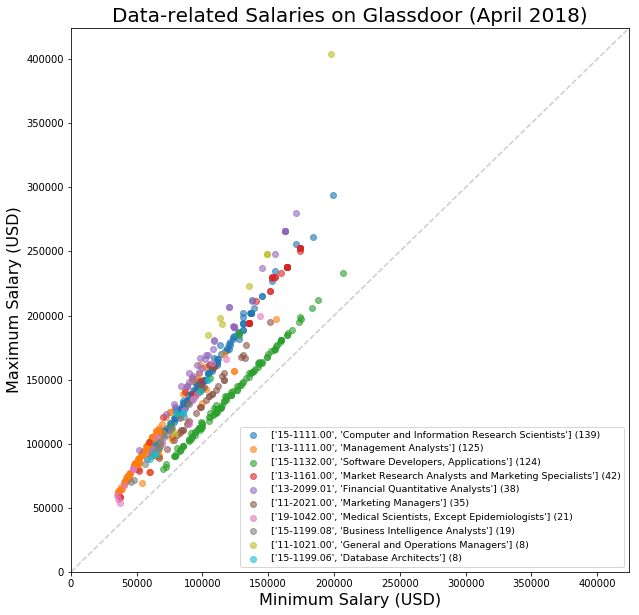

In [4]:
plt.figure(figsize = (10, 10))

for cat in list(df['cat'].value_counts().index):
    lil_df = df.loc[df['cat'] == cat, ['minsal', 'maxsal']]
    if len(lil_df) > 7:
        plt.scatter(lil_df['minsal'], lil_df['maxsal'], label = '{} ({})'.format(cat, len(lil_df)), alpha = 0.6)

plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.legend(loc = 'best', fontsize = 9.5)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.show();

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Looks like we don't want "Software Developers, Applications," "Management Analysts," and "Marketing Managers," based on salary and area of expertise considerations.  

In [5]:
mask = [False if 
        ('15-1132.00' in x) |  ## software developers/applications X
        ('11-2021.00' in x) |  ## marketing managers X
        ('13-1111.00' in x)   ## management analysts X
        else True for x in df['cat']]
df = df[mask]
print(round(len(df)/orig_len, 2))

0.53


In [6]:
list(df['cat'].value_counts().index)

["['15-1111.00', 'Computer and Information Research Scientists']",
 "['13-1161.00', 'Market Research Analysts and Marketing Specialists']",
 "['13-2099.01', 'Financial Quantitative Analysts']",
 "['19-1042.00', 'Medical Scientists, Except Epidemiologists']",
 "['15-1199.08', 'Business Intelligence Analysts']",
 "['15-1199.06', 'Database Architects']",
 "['11-1021.00', 'General and Operations Managers']",
 "['11-3021.00', 'Computer and Information Systems Managers']",
 "['19-1029.01', 'Bioinformatics Scientists']",
 "['13-2051.00', 'Financial Analysts']",
 "['41-3031.02', 'Sales Agents, Financial Services']",
 "['11-9021.00', 'Construction Managers']",
 "['11-3031.02', 'Financial Managers, Branch or Department']",
 "['17-2112.00', 'Industrial Engineers']",
 "['19-2041.00', 'Environmental Scientists and Specialists, Including Health']",
 "['15-1199.07', 'Data Warehousing Specialists']",
 "['15-1134.00', 'Web Developers']",
 "['11-3051.00', 'Industrial Production Managers']",
 "['11-9041.

In [7]:
mask = [False if 
        
        ## not what i do
        ('15-1199.08' in x) |  ## 'Business Intelligence Analysts'
        ('11-3031.02' in x) |  ## 'Financial Managers, Branch or Department'
        ('11-2011.00' in x) |  ## 'Advertising and Promotions Managers'
        ('11-9021.00' in x) |  ## 'Construction Managers'
        ('11-9041.00' in x) |  ## 'Architectural and Engineering Managers'
        ('11-1021.00' in x) |  ## 'General and Operations Managers'
        ('15-1199.08' in x) |  ## 'Business Intelligence Analysts'
        ('13-2051.00' in x) |  ## 'Financial Analysts' 
        ('15-1199.07' in x) |  ## 'Data Warehousing Specialists' 
        ('15-1199.06' in x) |  ## 'Database Architects'
        ('41-3031.02' in x) |  ## 'Sales Agents, Financial Services'
        ('17-2112.00' in x) |  ## 'Industrial Engineers'
        ('15-1134.00' in x) |  ## 'Web Developers'

        ('19-4061.00' in x) |  ## 'Social Science Research Assistants'
        ('13-2011.02' in x) |  ## 'Auditors'
        ('15-1121.00' in x) |  ## 'Computer Systems Analysts'
        ('11-9121.01' in x) |  ## 'Clinical Research Coordinators'
        ('51-4061.00' in x) |  ## 'Model Makers, Metal and Plastic'
        ('15-1199.09' in x) |  ## 'Information Technology Project Managers'
        ('41-4012.00' in x) |  ## 'Sales Reps..'
        ('11-3051.00' in x) |  ## 'Industrial Production Managers'
        ('19-3031.02' in x) |  ## 'Clinical Psychologists'
        ('11-3021.00' in x) |  ## 'Computer and Information Systems Managers'
        ('11-9199.00' in x)   ## 'Managers, All Other'

        else True for x in df['cat']]
df = df[mask]
print(round(len(df)/orig_len, 2))

0.41


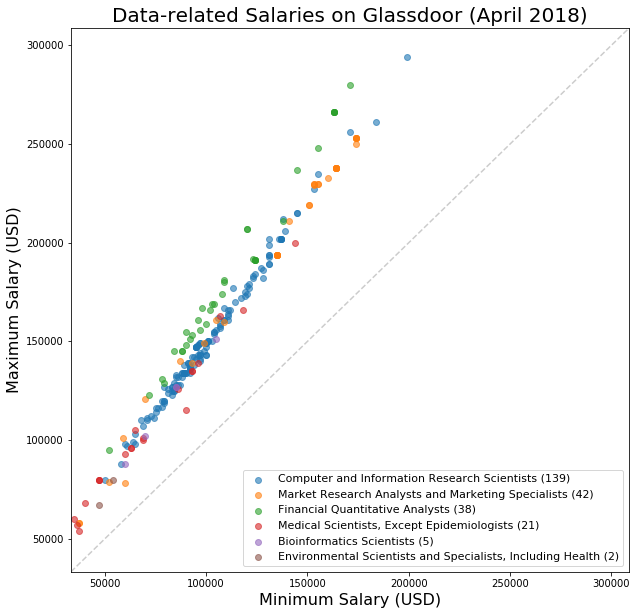

In [8]:
plt.figure(figsize = (10, 10))

for cat in list(df['cat'].value_counts().index):
    lil_label = ast.literal_eval(cat)[1]
    lil_df = df.loc[df['cat'] == cat, ['minsal', 'maxsal']]
#     if len(lil_df) > 1:
    plt.scatter(lil_df['minsal'], lil_df['maxsal'], label = '{} ({})'.format(lil_label, len(lil_df)), alpha = 0.6)

plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.legend(loc = 'best', fontsize = 11)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.show();

### description

In [9]:
df['wcount'] = [len(x.split(' ')) for x in df['descr']]

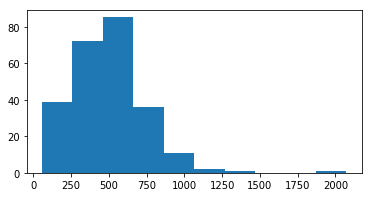

In [10]:
plt.figure(figsize = (6, 3))
df['wcount'].hist()
plt.grid(False)
plt.show();

In [11]:
keywords = []
for which in [
    'munging',
    'github', 
    'python', 
    'matplotlib',
    'd3',
    'open source', 
    ' sas ', 
    'c++', 
    ' r ',
    'sql',
    'flask',
    'shiny',
    ' aws ',
    'hadoop',
    'spark',
    'excel',
    'matlab',
    'scala',
    'architecture',
    'engineer',
    'machine learning',
    'nlp',
    'keras',
    'tensorflow',
    'neural',
    'statistics',
    'advanced degree',
    'kaggle', 
    'women', 
    'female', 
    'travel',
    'maternity',
    'parental',
    'family',
    'remote',
    'vacation',
    'europe'
]:
    keywords.append((which.lstrip().rstrip(), sum([True if which in x.lower() else False for x in df['descr']])))
keywords = pd.DataFrame(keywords, columns = ['keyword', 'count']).sort_values(by = 'count', ascending = False).reset_index(drop = True)
keywords

keyword  count
0             python    161
1           engineer    144
2   machine learning    135
3         statistics    128
4              excel    106
5                sql     96
6              scala     62
7             hadoop     57
8              spark     53
9                c++     53
10                 r     51
11            travel     33
12            matlab     31
13               nlp     30
14       open source     24
15      architecture     19
16   advanced degree     16
17          vacation     15
18        tensorflow     14
19            neural     13
20               aws     12
21            family     12
22             women     11
23                d3     10
24          parental      7
25             keras      7
26               sas      6
27            female      6
28            europe      5
29            github      4
30             flask      4
31        matplotlib      4
32            kaggle      3
33             shiny      3
34           munging      3
35            remote      2
36         maternity      1

In [12]:
mask = [True if 'europe' in x.lower() else False for x in df['descr']]

df[mask]['orgname'].value_counts()

HelloFresh            2
Medidata Solutions    1
Bloomberg             1
Deutsche Bank         1
Name: orgname, dtype: int64

In [13]:
print(len(df))

exclude = [
    ' sas ', 
#     'hadoop',
    'excel'
]
for wordlet in exclude:
    mask = [False if wordlet in x.lower() else True for x in df['descr']]
    df = df[mask]

print(len(df))

require = [
    'python',
#     'data sci'
]
for wordlet in require:
    mask = [True if wordlet in x.lower() else False for x in df['descr']]
    df = df[mask]
    
print(len(df))

247
138
99


### stars

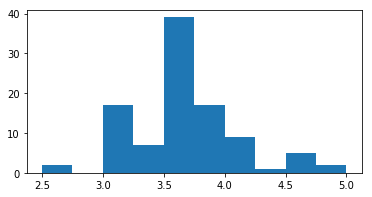

In [14]:
plt.figure(figsize = (6, 3))
df['stars'].hist()
plt.grid(False)
plt.show();

In [15]:
df.loc[df['stars'] <= 3.0, 'orgname'].value_counts()

CooperSurgical     1
Softcom Systems    1
Aptus Health       1
Galvanize          1
OpenText           1
Rodale             1
Name: orgname, dtype: int64

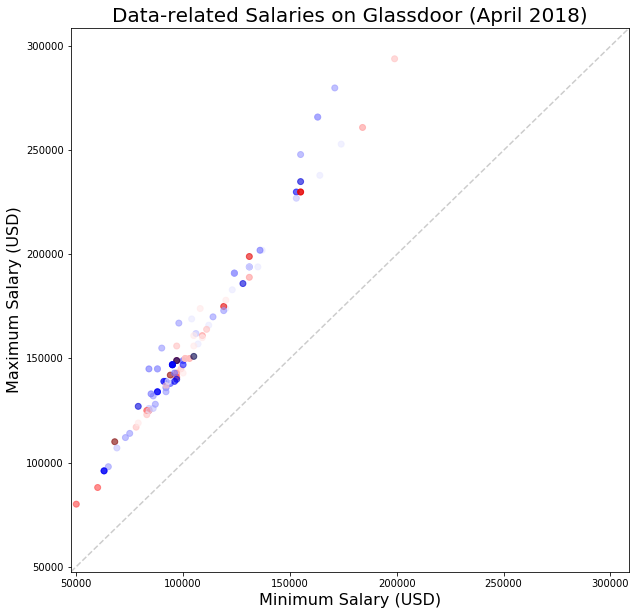

In [16]:
plt.figure(figsize = (10, 10))

plt.scatter(
    df['minsal'], 
    df['maxsal'], 
    alpha = 0.6, 
    c = df['stars'],
    cmap = 'seismic'
)

plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.show();

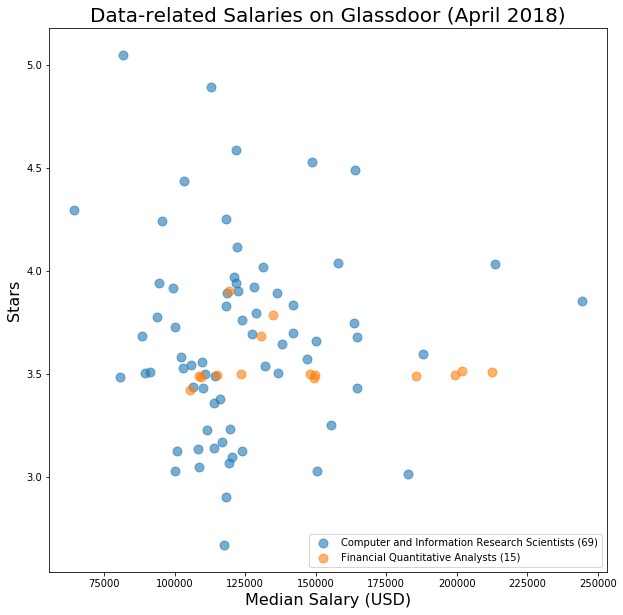

In [17]:
plt.figure(figsize = (10, 10))

for cat in list(df['cat'].value_counts().index):
    lil_label = ast.literal_eval(cat)[1].split(',')[0]
    lil_df = df.loc[df['cat'] == cat, ['stars', 'medsal']]
    if len(lil_df) > 10:
        plt.scatter(
            rand_jitter(lil_df['medsal']), 
            rand_jitter(lil_df['stars']), 
            label = '{} ({})'.format(lil_label, len(lil_df)), 
            alpha = 0.6, 
            s = 80
        )

plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 10)
plt.xlabel('Median Salary (USD)', fontsize = 16)
plt.ylabel('Stars', fontsize = 16)
plt.show();

In [18]:
df = df[df['stars'] > 3.0]
print(round(len(df)/orig_len, 2))

0.15


### industry

In [19]:
## any with missing industry were assigned company name as industry
df['industry'].value_counts()

Finance                      39
Information Technology       18
Business Services            14
Media                         5
Insurance                     3
Consumer Services             3
Accounting & Legal            3
Oath (industry not given)     2
Retail                        2
Non-Profit                    1
Real Estate                   1
Government                    1
Travel & Tourism              1
Name: industry, dtype: int64

### organization name & employer ID

In [20]:
df['orgname'].value_counts()[df['orgname'].value_counts() > 1]

Open Systems Technologies (NYC)    7
Capital One                        6
CitiGroup                          5
Citibank                           5
J.P. Morgan                        5
HelloFresh                         3
Two Sigma                          3
Oath                               2
Macy's                             2
Spotify                            2
Rockstar Games                     2
S&P Global                         2
PwC                                2
AIG                                2
Bloomberg                          2
FactSet                            2
Name: orgname, dtype: int64

### jobtitleid

In [21]:
df['jobtitleid'].value_counts().head()

-1          46
 119899     20
 32447       4
 3042870     2
 3069904     2
Name: jobtitleid, dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Job title ID "-1" appears to be given to job titles that are wordier than the standard set.  See examples below. 

In [22]:
## check out -1
df.loc[df['jobtitleid'] == -1, 'title'].value_counts()[:10]

MQA - Algorithmic Trading Quantitative Analyst Associate/VP         2
Multi-Asset Quantitative Analyst (Structurer)                       2
MQA - CMBS Quantitative Analyst – Associate/VP                      2
MQA - Algorithmic Trading Quantitative Analyst – Associate/VP       2
Senior Data Scientist - BLAW                                        1
Tumblr: Data Scientist (Analytics)                                  1
Quantitative Research Position – Quantitative Portfolio Modeling    1
Machine Learning Research Scientist 113550                          1
Innovation & Technology Data Scientist                              1
Decision and Data Scientist, Associate/Vice President               1
Name: title, dtype: int64

In [23]:
## check out not -1
jobtitleid_dict = {}
for jobtitleid in list(df['jobtitleid'].value_counts().index):
    if jobtitleid == -1:
        pass
    else:
        x = df.loc[df['jobtitleid'] == jobtitleid, 'title'].value_counts()
        jobtitleid_dict.update({jobtitleid : (x.index)[0]})
        print(str(jobtitleid) + '    ', '\t', x.sum(), '\t', list(x.index))

119899     	 20 	 ['Data Scientist']
32447     	 4 	 ['Quantitative Analyst']
3042870     	 2 	 ['Data Scientist, Marketing']
3069904     	 2 	 ['Sr. Data Scientist']
1293511     	 2 	 ['Manager, Data Scientist']
567229     	 2 	 ['Lead Data Scientist']
3093646     	 1 	 ['AI Research Scientist']
238479     	 1 	 ['Machine Learning Engineer']
3568281     	 1 	 ['Senior Associate, Data Scientist']
1108008     	 1 	 ['Security Data Scientist']
2377004     	 1 	 ['Director Data Scientist']
3206325     	 1 	 ['Data Scientist - Senior Associate']
1016440     	 1 	 ['Senior Machine Learning Engineer']
406074     	 1 	 ['Jr Data Scientist']
11764     	 1 	 ['Bioinformatics Scientist']
478272     	 1 	 ['Data Scientist II']
32457     	 1 	 ['Quantitative Research Analyst']
274009     	 1 	 ['Senior Data Scientist']
109679     	 1 	 ['Fixed Income Quantitative Research Analyst']
832704     	 1 	 ['Sr. Scientist']
893118     	 1 	 ['Data Scientist / Statistician']


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Before removing positions based on specific interest/etc., let's see what we have:

## Top 10 highest max salary

In [24]:
df.sort_values(by = 'maxsal', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'medsal', 'maxsal']][:10]

title  dateposted  \
67   Decision and Data Scientist, Associate/Vice Pr...  2018-04-15   
531     MQA - CMBS Quantitative Analyst – Associate/VP  2018-04-11   
584  MQA - Algorithmic Trading Quantitative Analyst...  2018-04-14   
295  MQA - Algorithmic Trading Quantitative Analyst...  2018-04-14   
54                                  Sr. Data Scientist  2018-04-17   
498  CIB Risk – Quantitative Research Market Risk M...  2018-04-09   
508                      Quantitative Research Analyst  2018-04-17   
485  CIB QR - Quantitative Research Equities - Vice...  2018-04-15   
279  Quantitative Research Position – Quantitative ...  2018-04-17   
236        Quantitative Researcher in Machine Learning  2018-04-18   

                   industry        orgname  stars       jobid  minsal  medsal  \
67                  Finance  Goldman Sachs    3.9  2694902862  199000  242000   
531                 Finance      CitiGroup    3.5  2449258018  171000  211000   
584                 Finance      CitiGroup    3.5  2665737860  163000  200000   
295                 Finance      CitiGroup    3.5  2665869193  163000  200000   
54   Information Technology        Spotify    4.0  2736550824  184000  218000   
498                 Finance    J.P. Morgan    3.7  2728130694  174000  205000   
508                 Finance          PIMCO    3.5  2696214703  155000  189000   
485                 Finance    J.P. Morgan    3.7  2695098999  164000  194000   
279                 Finance      Two Sigma    4.5  1819879820  155000  190000   
236                 Finance      Two Sigma    4.5  1876536512  155000  190000   

     maxsal  
67   294000  
531  280000  
584  266000  
295  266000  
54   261000  
498  253000  
508  248000  
485  238000  
279  230000  
236  230000

## 10 most recently posted

In [25]:
df.sort_values(by = 'dateposted', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'medsal', 'maxsal']][:10]

title  dateposted  \
97                         Data Scientist Analyst Jg18  2018-04-22   
25                                      Data Scientist  2018-04-22   
22                                      Data Scientist  2018-04-21   
64                               Senior Data Scientist  2018-04-21   
244                               Quantitative Analyst  2018-04-21   
48                         Data Scientist Analyst JG18  2018-04-21   
36                                      Data Scientist  2018-04-21   
105                            Manager, Data Scientist  2018-04-21   
353          Senior Quantitative Analyst - Market Risk  2018-04-21   
351  Quantitative Analyst - Commodities and Global ...  2018-04-20   

                   industry              orgname  stars       jobid  minsal  \
97                Insurance                  AIG    3.1  2742188031   88000   
25        Business Services  BlueLine Associates    3.9  2741864698   99000   
22                   Retail               Macy's    3.2  2741284975   92000   
64   Information Technology           StockTwits    4.5  2702445263  119000   
244                 Finance             Citibank    3.5  2741481066   88000   
48                Insurance                  AIG    3.1  2741081077   88000   
36                  Finance   S&P Global Ratings    3.3  2741461300  100000   
105                  Retail               Macy's    3.2  2741285004  100000   
353                 Finance          Capital One    3.9  2741169852   97000   
351                 Finance      Macquarie Group    3.7  2554397556  104000   

     medsal  maxsal  
97   109000  134000  
25   120000  145000  
22   113000  139000  
64   144000  175000  
244  110000  145000  
48   109000  134000  
36   122000  149000  
105  121000  147000  
353  120000  156000  
351  130000  169000

## 10 highest star ratings

In [26]:
df.sort_values(by = 'stars', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'medsal', 'maxsal']][:10]

title  dateposted  \
32                                      Data Scientist  2018-04-17   
4                                       Data Scientist  2018-04-10   
63                              Data Scientist-Revenue  2018-04-09   
69                Data Scientist - Insurance Analytics  2018-04-20   
64                               Senior Data Scientist  2018-04-21   
236        Quantitative Researcher in Machine Learning  2018-04-18   
279  Quantitative Research Position – Quantitative ...  2018-04-17   
15                                      Data Scientist  2018-04-16   
152                           Bioinformatics Scientist  2018-04-17   
23                                      Data Scientist  2018-04-20   

                   industry                        orgname  stars       jobid  \
32               Non-Profit          New York Presbyterian    5.0  2739782838   
4    Information Technology                       SeatGeek    4.9  2204974404   
63   Information Technology                Better Mortgage    4.6  2661378399   
69                  Finance                      Two Sigma    4.5  2399151231   
64   Information Technology                     StockTwits    4.5  2702445263   
236                 Finance                      Two Sigma    4.5  1876536512   
279                 Finance                      Two Sigma    4.5  1819879820   
15   Information Technology                            Via    4.4  2209238775   
152        Travel & Tourism  New York Stem Cell Foundation    4.2  2736543085   
23              Real Estate                         Zillow    4.2  2740056176   

     minsal  medsal  maxsal  
32    68000   86000  110000  
4     94000  115000  142000  
63    97000  122000  149000  
69   131000  163000  199000  
64   119000  144000  175000  
236  155000  190000  230000  
279  155000  190000  230000  
15    84000  103000  125000  
152   60000   70000   88000  
23    97000  117000  141000

## Selection

In [27]:
already_applied = [
    ## Two Sigma
    2722723989,
    2399151231,
    2399151229,
    1819879820,
    
    ## HotelTonight
    2699359507,
    
    ## Enigma
    2394390409,
    
    ## Intent Media
    2557056478,
    
    ## Spotify
    2697559288,
    
    ## Goldman Sachs
    2694902862,
    
    ## PwC
    2729664491,
    
    ## McKinsey
    2690497767,
    
    ## KPMG
    2699280853,
    
    ## JP Morgan
    2730138226,
    2698644772, ## python/open source --> good
    2689012522,
    
    ## Medidata
    2740394669
]

under_over_qual = [
    ## Two Sigma
    2574562599, ## PhD
    1876536512, ## PhD
    
    ## Citi
    2449258018, ## mortgage expertise
    2360995902, ## C++, min 2yr interest rate deriv modeling
    2665869193, ## 3yr trading exp/etc
    2665737860, ## 3yr trading exp/etc
    2617778959, ## 'good equity derivatives knowledge'
    2620484252, ## 'good equity derivatives knowledge'
    
    ## Spotify
    2736550824, ## 8yr exp
    
    ## Mizuho Financial Group 
    2732951235, ## SAS
    
    ## JP Morgan
    2702715467, ## SAS/Oracle/SQL in application
    2702714898, ## SAS/Oracle/SQL in application
    2728130694, ## way too many spec questions in application
    
    ## PIMCO
    2696214703, ## 7-10yr exp
    
    ## Goldman Sachs
    2646037850, ## capital markets exp
    
    ## National Debt Relief
    2690909493,
    
    ## LINK BROKEN & CHECKED
    2739782838, ## NY Presbyterian
]

mask = [False if x in already_applied else True for x in df['jobid']]

df = df[mask]

mask = [False if x in under_over_qual else True for x in df['jobid']]

df = df[mask]

In [28]:
## these are excluded based on bad glassdoor reviews 
## (mostly poor-management-by-overwhelmingly-male-leadership-related stuff), 
## or because the work involves something i can't see myself doing day in/day out
## OR miscellaneous

no = [
    'Trade Desk',
    'StockTwits',
    'Betterment',
    'BlueLine Associates',
    'Datadog',
    'FactSet',
    'Bluecore',
    'Impact',
    'Oliver Wyman',
    'Citadel',
    'Ayasdi',
    'AIG',
    'Via', ## sorry saar! :)
    'HelloFresh',
    'BNP Paribas',
    'Vettery',
    'Zillow',
    'Open Systems Technologies (NYC)',
    'Dataminr' ## CRH, though
]

mask = [False if x in no else True for x in df['orgname']]

df = df[mask]
print(len(df))

57


## Top 10 highest max salary

In [29]:
df.sort_values(by = 'maxsal', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'medsal', 'maxsal']][:10]

title  dateposted  \
485  CIB QR - Quantitative Research Equities - Vice...  2018-04-15   
102                       Senior Data Scientist - BLAW  2018-04-12   
149            Associate Director, Lead Data Scientist  2018-04-11   
144                  CIB-Data Scientist Vice President  2018-04-12   
372  CIB QR - Quantitative Research - Algo Executio...  2018-04-19   
112                            Director Data Scientist  2018-04-16   
568  MQA - Algorithmic Trading Quantitative Analyst...  2018-04-14   
561     MQA - CMBS Quantitative Analyst – Associate/VP  2018-04-11   
510  MQA - Algorithmic Trading Quantitative Analyst...  2018-04-14   
104  Data Scientist, Assurance (FIDS, FTDS)(Manager...  2018-04-13   

                   industry      orgname  stars       jobid  minsal  medsal  \
485                 Finance  J.P. Morgan    3.7  2695098999  164000  194000   
102  Information Technology    Bloomberg    3.6  2639379998  153000  186000   
149                 Finance   S&P Global    3.4  2690919705  136000  166000   
144                 Finance  J.P. Morgan    3.7  2730828640  137000  167000   
372                 Finance  J.P. Morgan    3.7  2738763411  135000  157000   
112                   Media       Hearst    3.3  2695548497  131000  158000   
568                 Finance     Citibank    3.5  2665733001  124000  151000   
561                 Finance     Citibank    3.5  2449259317  124000  151000   
510                 Finance     Citibank    3.5  2665869210  124000  151000   
104      Accounting & Legal           EY    3.7  2731948794  123000  151000   

     maxsal  
485  238000  
102  227000  
149  202000  
144  202000  
372  194000  
112  194000  
568  191000  
561  191000  
510  191000  
104  183000

## Most recently posted

In [30]:
df.sort_values(by = 'dateposted', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'medsal', 'maxsal']][:10]

title  dateposted  \
105                            Manager, Data Scientist  2018-04-21   
22                                      Data Scientist  2018-04-21   
244                               Quantitative Analyst  2018-04-21   
36                                      Data Scientist  2018-04-21   
353          Senior Quantitative Analyst - Market Risk  2018-04-21   
351  Quantitative Analyst - Commodities and Global ...  2018-04-20   
35   Data Scientist, Personalization and Recommenda...  2018-04-20   
115                          Geospatial Data Scientist  2018-04-20   
88                               AI Research Scientist  2018-04-20   
85   Principal Associate, Data Scientist - Time Series  2018-04-20   

                   industry             orgname  stars       jobid  minsal  \
105                  Retail              Macy's    3.2  2741285004  100000   
22                   Retail              Macy's    3.2  2741284975   92000   
244                 Finance            Citibank    3.5  2741481066   88000   
36                  Finance  S&P Global Ratings    3.3  2741461300  100000   
353                 Finance         Capital One    3.9  2741169852   97000   
351                 Finance     Macquarie Group    3.7  2554397556  104000   
35   Information Technology              Tumblr    4.0  2321589953  109000   
115              Government    City of New York    3.5  2740098797   73000   
88   Information Technology           Bloomberg    3.6  2554413332   86000   
85                  Finance         Capital One    3.9  2701234460  101000   

     medsal  maxsal  
105  121000  147000  
22   113000  139000  
244  110000  145000  
36   122000  149000  
353  120000  156000  
351  130000  169000  
35   133000  161000  
115   91000  112000  
88   104000  126000  
85   124000  150000

## Highest star ratings

In [31]:
df.sort_values(by = 'stars', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'medsal', 'maxsal']][:10]

title  dateposted  \
4                                       Data Scientist  2018-04-10   
63                              Data Scientist-Revenue  2018-04-09   
152                           Bioinformatics Scientist  2018-04-17   
12                                      Data Scientist  2018-04-13   
35   Data Scientist, Personalization and Recommenda...  2018-04-20   
133                            Manager, Data Scientist  2018-04-14   
122                   Senior Associate, Data Scientist  2018-04-13   
33                                      Data Scientist  2018-04-19   
353          Senior Quantitative Analyst - Market Risk  2018-04-21   
85   Principal Associate, Data Scientist - Time Series  2018-04-20   

                   industry                        orgname  stars       jobid  \
4    Information Technology                       SeatGeek    4.9  2204974404   
63   Information Technology                Better Mortgage    4.6  2661378399   
152        Travel & Tourism  New York Stem Cell Foundation    4.2  2736543085   
12   Information Technology                         Enigma    4.1  2733226886   
35   Information Technology                         Tumblr    4.0  2321589953   
133                 Finance                    Capital One    3.9  2390761557   
122                 Finance                    Capital One    3.9  2732836976   
33        Business Services                      MediaMath    3.9  2699428805   
353                 Finance                    Capital One    3.9  2741169852   
85                  Finance                    Capital One    3.9  2701234460   

     minsal  medsal  maxsal  
4     94000  115000  142000  
63    97000  122000  149000  
152   60000   70000   88000  
12    97000  119000  143000  
35   109000  133000  161000  
133  111000  136000  164000  
122   92000  113000  137000  
33    83000  101000  123000  
353   97000  120000  156000  
85   101000  124000  150000

### date posted

In [32]:
df['dateposted'] = [dt.strptime(x, '%Y-%m-%d') for x in df['dateposted']]
df['validthrough'] = [dt.strptime(x, '%Y-%m-%d') for x in df['validthrough']]

In [33]:
df['dateposted'].value_counts()

2018-04-12    9
2018-04-11    7
2018-04-20    6
2018-04-21    5
2018-04-14    5
2018-04-17    5
2018-04-10    5
2018-04-16    4
2018-04-13    4
2018-04-19    3
2018-04-18    2
2018-04-09    1
2018-04-15    1
Name: dateposted, dtype: int64

In [34]:
df['validthrough'].value_counts()

2018-05-22    57
Name: validthrough, dtype: int64